In [1]:
import pandas as pd
import requests as re
import numpy as np
import matplotlib.pyplot as plt

import asyncio
from aiohttp import ClientSession
from loguru import logger

pd.set_option('display.max_rows', 65)
pd.set_option('display.max_columns', 65)



In [2]:
today = pd.Timestamp.today()
day, month, year = today.day, today.month, today.year
data = pd.read_csv(f'data_1_7_2020.csv', index_col='Unnamed: 0')
data.drop_duplicates(inplace=True)
data = data[data.index.notna()]
data.drop(['Unnamed: 24'], axis=1, inplace=True)
data.shape

(409, 63)

In [3]:
def explore(df):
    data = {
        'type': df.dtypes,
        'mean': df.mean(),
        'std': df.std(),
        'NaN': df.isna().sum(),
        'NaN (%)': np.round(df.isna().sum()/df.shape[0], 2)
    }
    explore = pd.DataFrame(index=df.columns, data=data)
    return explore

In [4]:
explore(data).head(64)

,type,mean,std,NaN,NaN (%)
Tipo,object,NaN,NaN,1,0.00
Empresa,object,NaN,NaN,0,0.00
Setor,object,NaN,NaN,3,0.01
Subsetor,object,NaN,NaN,3,0.01
Cotação,int64,2633.315403,3797.205043,0,0.00
Data últ cot,object,NaN,NaN,0,0.00
Min 52 sem,int64,1591.748166,2421.362913,0,0.00
Max 52 sem,int64,3626.366748,5046.724298,0,0.00
Vol $ méd (2m),object,NaN,NaN,0,0.00
Valor de mercado,object,NaN,NaN,0,0.00


In [5]:
data.head()

,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,oscilations_Dia,oscilations_Mês,oscilations_30 dias,oscilations_12 meses,oscilations_2020,oscilations_2019,oscilations_2018,oscilations_2017,oscilations_2016,oscilations_2015,indicator_P/L,indicator_P/VP,indicator_P/EBIT,indicator_PSR,indicator_P/Ativos,indicator_P/Cap. Giro,indicator_P/Ativ Circ Liq,indicator_Div. Yield,indicator_EV / EBITDA,indicator_EV / EBIT,indicator_Cres. Rec (5a),indicator_LPA,indicator_VPA,indicator_Marg. Bruta,indicator_Marg. EBIT,indicator_Marg. Líquida,indicator_EBIT / Ativo,indicator_ROIC,indicator_ROE,indicator_Liquidez Corr,indicator_Div Br/ Patrim,indicator_Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,demonstrative12m_Receita Líquida,demonstrative12m_EBIT,demonstrative12m_Lucro Líquido,demontrative3m_Receita Líquida,demontrative3m_EBIT,demontrative3m_Lucro Líquido,Cart. de Crédito,Depósitos,demonstrative12m_Result Int Financ,demonstrative12m_Rec Serviços,demontrative3m_Result Int Financ,demontrative3m_Rec Serviços
ETER3,ON,ETERNIT ON,Construção e Engenharia,Materiais de Construção,358,30/06/2020,196,685,2.097.600,113.751.000,226.612.000,31/03/2020,31.774.000,"-4,28%","35,09%","35,09%","62,45%","-10,38%","52,69%","-49,27%","-30,38%","-36,80%","-28,45%",-5617.00000,-644.0,-231,024,021,-1480,-035,"0,0%",-744,-461,"-16,0%",-6,-56.0,"14,3%","-10,3%","-0,4%","-8,9%","-10,3%","11,5%",097,-700,087,552.460.000,10.866.000,245.358.000,123.727.000,112.861.000,-17.668.000,478.627.000,-49.158.000,-2.025.000,113.636.000,-9.302.000,-14.848.000,NaN,NaN,NaN,NaN,NaN,NaN
PRNR3,ON NM,PRINER ON NM,Serviços,Serviços Diversos,970,30/06/2020,658,1497,2.597.920,369.037.000,301.220.000,31/03/2020,38.045.000,"-1,32%","6,59%","6,59%","-27,61%","-27,61%","0,00%","0,00%","0,00%","0,00%","0,00%",-16828.00000,156.0,4255,110,101,192,282,"0,0%",1046,3473,"13,8%",-6,620.0,"14,2%","2,6%","-2,1%","2,4%","4,1%","-0,9%",374,034,092,366.641.000,147.452.000,262.314.000,79.635.000,-67.817.000,235.884.000,336.854.000,8.672.000,-2.193.000,71.122.000,2.799.000,4.044.000,NaN,NaN,NaN,NaN,NaN,NaN
COGN3,ON,COGNA ON,Diversos,Educacional,661,30/06/2020,366,1362,348.851.000,12.404.400.000,21.637.800.000,31/03/2020,1.876.610.000,"0,92%","25,67%","25,67%","-39,58%","-42,17%","30,33%","-50,09%","41,81%","44,07%","-34,70%",-29452.00000,68.0,1653,182,034,391,-108,"0,5%",1146,2883,"7,5%",-2,975.0,"59,2%","11,0%","-0,7%","2,1%","2,3%","-0,2%",197,066,019,36.283.300.000,2.909.300.000,6.448.990.000,12.142.800.000,9.233.470.000,18.294.700.000,6.815.550.000,750.632.000,-42.117.000,1.627.470.000,163.402.000,-39.120.000,NaN,NaN,NaN,NaN,NaN,NaN
NORD3,ON,NORDON INDS METALURGICAS SA ON,Máquinas e Equipamentos,Máqs. e Equips. Industriais,747,30/06/2020,131,1000,28.770,49.458.900,86.562.900,31/03/2020,6.621.000,"11,16%","100,27%","100,27%","549,57%","55,30%","251,10%","-77,13%","0,00%","0,00%","0,00%",-16.48630,-35.0,-7096,3195,291,-103,-032,"0,0%",-12419,-12419,"116,6%",0,-2105.0,"91,9%","-45,0%","-0,2%","-4,1%","-4,2%","0,0%",002,-027,009,17.023.000,176.000,1.056.000,37.280.000,37.104.000,-139.342.000,1.548.000,-697.000,-3.000,447.000,27.000,-46.000,NaN,NaN,NaN,NaN,NaN,NaN
DASA3,ON,DIAGNOSTICOS DA AMERICA SA ON,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...",6650,29/06/2020,2777,8025,6.255,31.974.100.000,34.894.000.000,31/03/2020,480.814.000,"0,00%","2,31%","2,31%","135,28%","16,19%","117,53%","-1,41%","55,91%","75,76%","-0,30%",-1.64046,796.0,12427,667,276,3544,-717,"0,6%",4479,13561,"13,6%",-4,836.0,"32,8%","5,4%","-0,3%","2,2%","2,6%","-0,5%",141,098,041,11.589.900.000,1.000.750.000,3.123.540.000,3.920.610.000,2.919.870.000,4.018.650.000,4.795.380.000,257.305.000,-19.491.000,1.456.870.000,14.435.000,-78.135.000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
columns_div_100 = [
    'Cotação','Min 52 sem', 'Max 52 sem', 'indicator_P/L',  'indicator_P/VP', 
    'indicator_P/EBIT', 'indicator_PSR',  'indicator_P/Ativos', 
    'indicator_P/Cap. Giro',  'indicator_P/Ativ Circ Liq',
    'indicator_EV / EBITDA', 'indicator_EV / EBIT', 'indicator_LPA', 
    'indicator_VPA', 'indicator_Liquidez Corr', 'indicator_Div Br/ Patrim',
    'indicator_Giro Ativos'
]

columns_clear_percentage = [
    'oscilations_Dia', 'oscilations_Mês', 'oscilations_30 dias',
    'oscilations_12 meses', 'oscilations_2020', 'oscilations_2019',
    'oscilations_2018', 'oscilations_2017', 'oscilations_2016',
    'oscilations_2015', 'indicator_Div. Yield', 'indicator_Cres. Rec (5a)',
    'indicator_Marg. Bruta', 'indicator_Marg. EBIT', 
    'indicator_Marg. Líquida', 'indicator_EBIT / Ativo', 'indicator_ROIC',
    'indicator_ROE'
]

columns_replace_comma_by_dot = columns_clear_percentage

columns_clear_dots = [
    'Vol $ méd (2m)', 'Valor de mercado', 'Valor da firma', 'Nro. Ações',
    'oscilations_Dia', 'oscilations_Mês', 'oscilations_30 dias',
    'oscilations_12 meses', 'oscilations_2020', 'oscilations_2019',
    'oscilations_2018', 'oscilations_2017', 'oscilations_2016',
    'oscilations_2015','indicator_Div. Yield','indicator_Cres. Rec (5a)',
    'indicator_Marg. Bruta', 'indicator_Marg. EBIT', 'indicator_Marg. Líquida', 'indicator_EBIT / Ativo', 'indicator_ROIC',
    'indicator_ROE',
    'Ativo', 'Disponibilidades', 'Ativo Circulante',
    'Dív. Bruta',  'Dív. Líquida', 'Patrim. Líq',
    'demonstrative12m_Receita Líquida', 'demonstrative12m_EBIT', 
    'demonstrative12m_Lucro Líquido', 'demontrative3m_Receita Líquida',
    'demontrative3m_EBIT', 'demontrative3m_Lucro Líquido', 'Cart. de Crédito',
    'Depósitos', 'demonstrative12m_Result Int Financ',
    'demonstrative12m_Rec Serviços', 'demontrative3m_Result Int Financ', 
    'demontrative3m_Rec Serviços'
]

columns_to_type_float = data.columns.drop([
    'Tipo', 'Empresa', 'Setor', 'Subsetor', 'Data últ cot', 
    'Últ balanço processado']).to_list()


In [7]:
class Preprocessor():
    def __init__(self, data: pd.DataFrame):
        self.df = data.copy()
        
    def _process_result(self, processed, inplace):
        if inplace:
            self.df[processed.columns] = processed
        else:
            return processed
    
    def clear_percentage(self, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: x.replace('%', '') if isinstance(x, str) else x
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    
    def div_100(self, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: x/100
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    
    def replace_comma_by_dot(self, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: x.replace(',', '.') if isinstance(x, str) else x # operation
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    
    def clear_dots(self, columns: list, inplace=False):
        to_process = self.df[columns]
        to_process = to_process.astype(str)
        
        func = lambda x: x.replace('.', '') # operation
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    
    def to_type(self, to_type, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: to_type(x) # operation

        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    
    def make_nan(self, to_make_nan, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: np.nan if x == to_make_nan else x
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    ######################
    def model(self, columns: list, inplace=False):
        to_process = self.df[columns]
        
        func = lambda x: x # operation
        
        processed = to_process.applymap(func)
        
        return self._process_result(processed, inplace)
    ######################
    
    def _repr_html_(self):
        return self.df._repr_html_()
        

In [8]:
process_data = Preprocessor(data)

process_data.clear_percentage(columns_clear_percentage, inplace=True)
process_data.clear_dots(columns_clear_dots, inplace=True)
process_data.replace_comma_by_dot(columns_replace_comma_by_dot, inplace=True)
process_data.make_nan('-', columns_to_type_float, inplace=True)
process_data.to_type(float, columns_to_type_float, inplace=True)
process_data.div_100(columns_div_100, inplace=True)

In [9]:
stocks = process_data.df

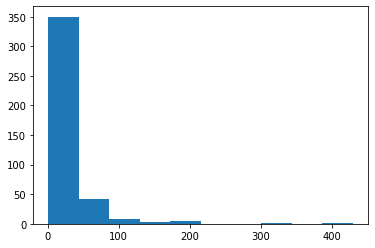

In [10]:
plt.hist(stocks['Cotação'])
plt.show()

In [15]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Plasma8
from bokeh.palettes import Turbo256, Inferno256

# prepare some data
x_label = 'Valor de mercado'
y_label =  'Patrim. Líq'
c_label = 'Setor'
palette_base = Inferno256

x = np.log(stocks[x_label])
y = np.log(stocks[y_label])

# Color definition
pace = np.floor(len(palette_base)/len(stocks[c_label].unique()))
palette = [palette_base[x] for x in range(0, len(palette_base), int(pace))]
colormap = dict(zip(stocks[c_label].unique(), palette))
colors = [colormap[setor] for setor in stocks[c_label]]

source = ColumnDataSource(data=dict(x=x,
                                    y=y, 
                                    paper=stocks.index,
                                    tip_sector=stocks[c_label],
                                    color=colors))
TOOLTIPS = [
    ('paper','@paper'),
    ('setor', '@tip_sector')
]
# output 
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example",
           x_axis_label=x_label, 
           y_axis_label=y_label,
           tooltips=TOOLTIPS)

# add a line renderer with legend and line thickness
# p.line(x, y, legend_label="Temp.", line_width=2)
p.circle(x='x', y='y', source=source, size=8, fill_color='color')
# show the results
show(p)

Loading BokehJS ...